In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "D:\hinel\sem7\SGP\Fire Guard\Dataset\Train"

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
                                      rotation_range=30,
                                      height_shift_range=0.2,
                                      fill_mode='nearest')

VALIDATION_DIR = "D:\hinel\sem7\SGP\Fire Guard\Dataset\Valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(224,224),
                                                       class_mode='categorical',
                                                       batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(224,224),
                                                              class_mode='categorical',
                                                              batch_size= 16)

Found 51140 images belonging to 4 classes.
Found 9666 images belonging to 2 classes.


In [2]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         2457984   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 384)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0

In [3]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('val_acc')>=0.98):
#       print('\nReached ^98%')
#       self.model.stop_training = True
# callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 15
    #callbacks=[callbacks]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 15 steps
Epoch 1/50
 1/15 [=>............................] - ETA: 1:14

InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[64,2] labels_size=[64,4]
	 [[node loss/dense_2_loss/softmax_cross_entropy_with_logits (defined at <ipython-input-3-d8fc4ec68dd6>:13) ]] [Op:__inference_distributed_function_1282]

Function call stack:
distributed_function


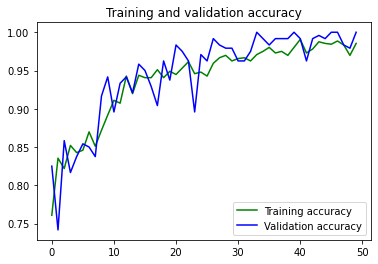

<Figure size 432x288 with 0 Axes>

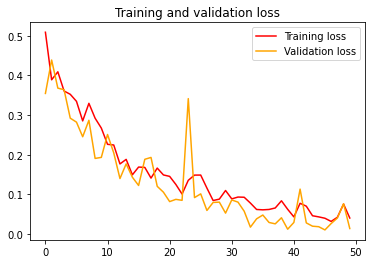

<Figure size 432x288 with 0 Axes>

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [25]:
#predicting any random image
import numpy as np
###from google.colab import files
from keras.preprocessing import image

###uploaded = files.upload()
###for fn in uploaded.keys():
  
path = 'D:\\hinel\\sem7\\SGP\\Fire Guard\\Dataset\\Kaggle-Fire-Detection\\79.jpg'
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) /255
classes = model.predict(x)
print(np.argmax(classes[0])==0, max(classes[0]))

True 0.9995121


In [26]:
model.save("D:\hinel\sem7\SGP\Fire Guard\Trained Models\CNN_model.h5")